In [2]:
from scipy import *
import numpy as np
import lenstools
import astropy.units as u
from lenstools import ConvergenceMap

%matplotlib inline

In [3]:
osato_DM, osato_FE,  osato_BA = (load('/Users/jia/Dropbox/weaklensing/troughs/run00%s.npy'%(fn))[:,0].reshape(4096,4096)
                                   for fn in ('DM','FE','BA'))
print osato_BA.shape 
conv_maps = [ConvergenceMap(imap, angle=5.0*u.deg) for imap in [osato_BA, osato_FE, osato_DM]]
conv_smooth=[imap.smooth(2.0*u.arcmin,kind="gaussianFFT",inplace=0) for imap in conv_maps]

(4096, 4096)


In [5]:
istd = 0.02#std(conv_smooth)

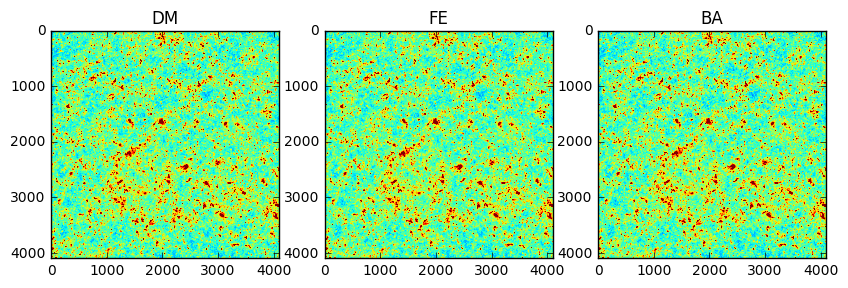

In [9]:
f, axes = subplots(1, 3, figsize=(10, 3))
for i in range(3):
    axes[i].imshow(conv_smooth[i].data,vmin=-3*istd, vmax=3*istd)
    axes[i].set_title(('DM','FE','BA')[i])

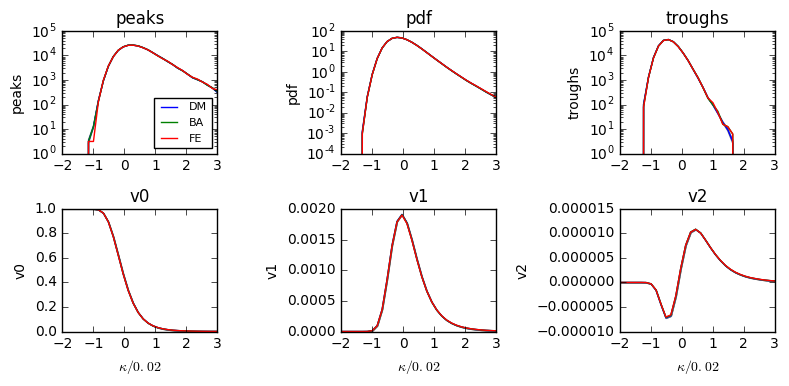

In [57]:
f, axes = subplots(2,3,figsize=(8,4))
axes=axes.flatten()
stats_DM = []
std_DM = []
for fn in ['DM','BA','FE']:
    nu, peaks, troughs, MFs, pdf, moments = load('stats/NG_%s.npy'%(fn)).T
    nu=nu[0]/istd
    peaks = array(list(peaks))
    troughs = array(list(troughs))
    MFs = array(list(MFs))
    pdf = array(list(pdf))
    moments = array(list(moments))
    v0, v1, v2 = MFs[:,0,:], MFs[:,1,:], MFs[:,2,:]
    
    for i in range(6):
        x=[1, -1][bool(i==2)]*nu
        istat = mean([peaks, pdf, troughs, v0, v1, v2][i],axis=0)
        if fn=='DM':
            stats_DM.append(istat)
            istd_DM=std([peaks, pdf, troughs, v0, v1, v2][i],axis=0)
            std_DM.append(istd_DM)
        ilabel= ['peaks', 'pdf', 'troughs', 'v0', 'v1', 'v2'][i]
        if i==2:
            axes[i].plot(x, istat, label=fn)
        else:
            axes[i].plot(x, istat, label=fn)
        if fn=='DM':
            dy=istd_DM*sqrt(5./2e4)
            axes[i].fill_between(x, istat-dy, istat+dy, alpha=0.5)
        axes[i].set_title(ilabel)
        axes[i].set_ylabel(ilabel)
axes[0].legend(loc=0, fontsize=8)
for i in range(6):
    axes[i].set_xlim(-2, 3)
    if i<3:
        axes[i].set_yscale('log')
    if i>2:
        axes[i].set_xlabel(r'$\kappa / 0.02$')
plt.tight_layout()


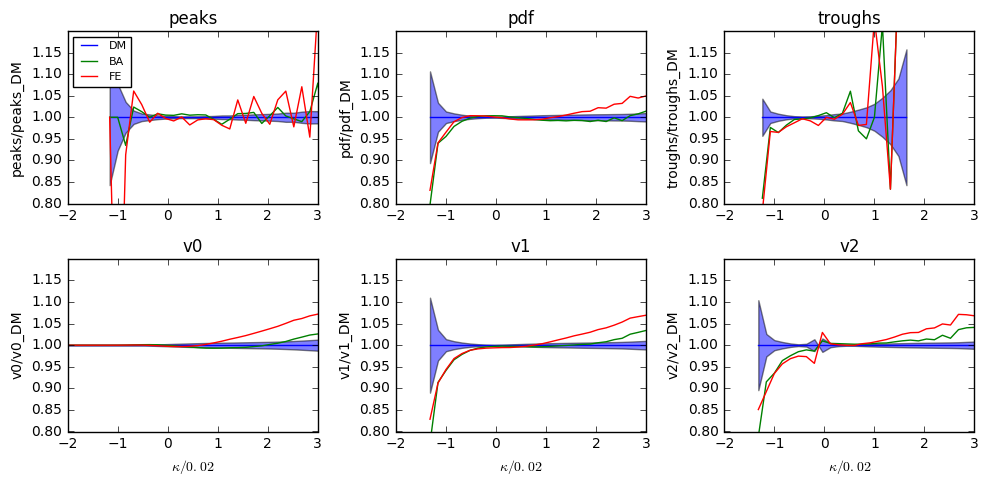

In [58]:
f, axes = subplots(2,3,figsize=(10,5))
axes=axes.flatten()
for fn in ['DM','BA','FE']:
    nu, peaks, troughs, MFs, pdf, moments = load('stats/NG_%s.npy'%(fn)).T
    nu=nu[0]/istd
    peaks = array(list(peaks))
    troughs = array(list(troughs))
    MFs = array(list(MFs))
    pdf = array(list(pdf))
    moments = array(list(moments))
    v0, v1, v2 = MFs[:,0,:], MFs[:,1,:], MFs[:,2,:]
    
    for i in range(6):
        x=[1, -1][bool(i==2)]*nu
        dy=(std_DM[i]/stats_DM[i])*sqrt(5/2e4)
        istat = mean([peaks, pdf, troughs, v0, v1, v2][i],axis=0)
        
        #axes[i].errorbar(x, istat/stats_DM[i], dy, label=fn)
        axes[i].plot(x, istat/stats_DM[i], label=fn)
        if fn=='DM':
            axes[i].fill_between(x, 1-dy, 1+dy, alpha=0.5)
        

for i in range(6):
    ilabel= ['peaks', 'pdf', 'troughs', 'v0', 'v1', 'v2'][i]
    axes[i].set_title(ilabel)
    axes[i].set_ylabel('%s/%s_DM'%(ilabel, ilabel))
    axes[i].set_xlim(-2, 3)
    axes[i].set_ylim(0.8, 1.2)
    if i>2:
        axes[i].set_xlabel(r'$\kappa / 0.02$')
        
axes[0].legend(loc=0, fontsize=8)
plt.tight_layout()